<a href="https://www.kaggle.com/code/sontadkt/fud-speech-detection?scriptVersionId=193143199" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents
1. [Introduction](#Introduction)<br>
    1.1. [Aim of the project](#Aim-of-the-project)<br>
2. [Dataset](#Dataset)<br>
    2.1. [Collection](#Collection)<br>
    2.2. [Data-Exploration](#Data-Exploration)<br>
3. [Data Processing](#Data-Processing)<br>
    3.1. [Stop words](#Stop-words)<br>
    3.2. [Tokenization](#Tokenization)<br>
    3.3. [Punctuations and Lematization](#Punctuations-and-Lematization)<br>
    3.4. [WordCloud](#WordCloud)<br>
4. [Training](#Training)<br>
5. [Modeling](#Modeling)
6. [Conclusions and next steps](#Conclusions-and-next-steps)


# Introduction
What is FUD?

**FUD**, which stands for "**fear**, **uncertainty**, and **doubt**," is an acronym used frequently in the **crypto space** that refers to the spreading of **negative emotions** and pessimism among investors and traders. As the cryptocurrency market is prone to high volatility and cycles of hype and panic, FUD arises easily and can dramatically impact crypto prices and market sentiment.

Much FUD spreads unintentionally through rumors or misinformation on crypto social media, while some attempt to intentionally manipulate the market through orchestrated FUD campaigns. These rumors play on traders' emotions of fear and greed, causing many to panic and sell their cryptocurrency assets at a steep discount or to miss out on buying opportunities. Mass panic and shifts in investor demand then lead to sudden drops or surges in the valuations of cryptocurrencies.

Experienced crypto traders and investors learn to identify when to invest and debunk such FUD in order to make more objective, long-term focused decisions aligned with the technology and fundamentals behind each digital asset. They understand how market cycles work and have diversified portfolios to weather periods of high volatility.

However, FUD continues to be a major force influencing the highly speculative world of crypto investing, especially among less informed retail investors. As the crypto industry matures, better information, transparency and disclosure requirements may help limit the impact of FUD. But for now, uncertainty and doubt remain defining features of this complex and volatile emerging asset class that can make or break crypto portfolios.

The concept of "**fear**, **uncertainty** and **doubt**" or **FUD** originated in the 1990s as a marketing tactic used by IBM to undermine confidence in their competitors' products. Since then, FUD has become a widely used acronym in the crypto space referring to the spread of negative emotions, misinformation, rumors and pessimism among investors and traders. This FUD proliferates rapidly on **social media**, especially during periods of high volatility or market crashes.

Many inexperienced retail crypto investors are highly susceptible to reacting emotionally to such FUD, including:

* Panic selling assets at a loss;
* Making irrational investment decisions;
* Falling for scam schemes that play on fear.


Others with malicious intents leverage social platforms to intentionally spread FUD and manipulate crypto prices. Over time, the crypto community has become more aware of coordinated FUD campaigns that play on fears over regulations, exchange hacks, bitcoin bubbles and other crypto-related uncertainties.

Legitimate issues raised in good faith may contribute to healthy skepticism. However, much of the doubt and skepticism swirling around cryptocurrencies on social feeds is distorted, misleading or unfounded. Savvy crypto investors learn to tune out this noise and debunk FUD by verifying facts from reliable sources.

## Impact of FUD

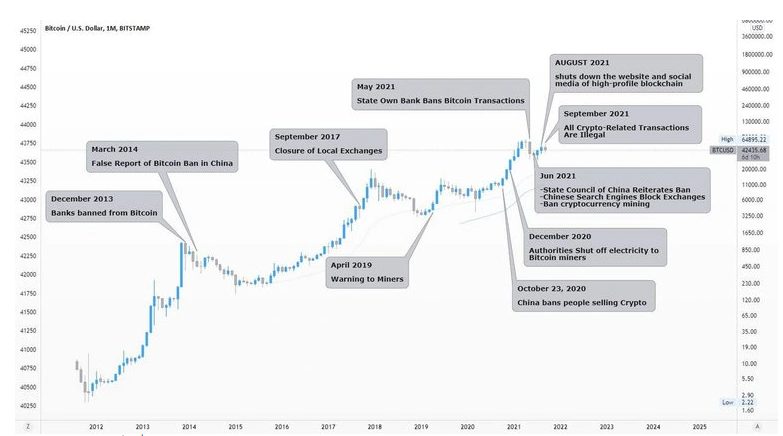

**2009 – Ban on Digital Currencies**
In June 2009, just a few months after the launch of Bitcoin, China's Ministry of Commerce and Ministry of Culture **banned** the use of digital currencies for payment of [goods and services in the real world.](http://bitcoinaddict.org/2021/09/27/chinas-long-history-of-bitcoin-fud-timeline/)

However, this move was not specifically aimed at Bitcoin but rather at reducing the impact of video-game currencies, which were expected to devalue the yuan.

**2014 – Bear Market Driven by China FUD**
After recovering from China’s **FUD** in 2013, the crypto industry faced another blow when rumors surfaced that the PBoC had completely banned Bitcoin transactions.

Although the news, which spread via Weibo in March 2014, turned out to be false, the market impact was disastrous. Thousands of traders and investors closed their positions, and BTC, which had been trading above 1,000 dollars at the end of 2013, dropped to 400 dollars just three months later.

## Aim of the project

In this notebook, I will demonstrate a model to detect negative and false statements, as well as those that express negative and anxiety-inducing language, can help reduce the burden on community owners and further alleviate the anxiety of community members

The key aspects I will discuss are:
- Gathering dataset from variours sources.
- Exploring FUD dataset
- text processing using a NLTK library
- Modeling with Long Short-Term Memory Model (LSTM)
- Future considerations and next steps

This work aims to build a **comprehensive understanding of Sentiment Analysis** and develop a Model that can serve as a **good starting point** for individuals interested in approaching Sentiment Analysis tasks using my open-source data.

This notebook will use the following building blocks:

- **Re**, Regular expressions are used for tasks like finding specific text patterns, replacing parts of a string, or validating formats
- **NLTK**, A library for natural language processing, offering tools for text analysis, parsing, and linguistic data processing
- **WordCloud**, used to generate visual representations of text data, where the size of each word indicates its frequency or importance in the dataset.

In [1]:
import string 
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
import nltk 
nltk.download("all")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk import tokenize,word_tokenize
from tqdm.notebook import tqdm_notebook, tqdm
from wordcloud import WordCloud, STOPWORDS
tqdm_notebook.pandas()

print("Tensorflow Version",tf.__version__)

2024-08-19 05:10:42.979941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 05:10:42.980052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 05:10:43.106530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron

# Dataset

Since FUD data is quite specific and there is **no open-source data available**, we initially considered using data from negative sentiment comments on general social media platforms. However, upon deeper study, we found that the dataset we obtained was too broad, leading to underfitting and making it unsuitable for use in pretraining. Therefore, we had to collect all the necessary data ourselves, which took approximately four months. The process was carried out as follows:

## Collection

**1. Data Collection from Credible Websites:**
Data was gathered from reliable news sources like Benzinga, Bloomberg, Yahoo! Finance, Reuters, and others. The focus was on impactful categories such as economics, investments, technology, finance, stocks, banking, cryptocurrency, forex, and NFTs.

**1. Data Collection from Online Platforms:**
Platforms like Twitter are key sources of FUD, where both factual news and misinformation are spread. Influencers in the investment community often sway their followers, sometimes leading to panic and further spreading of FUD.

## Data Analysis Methodology
For building a deep learning model, a dataset is essential. The dataset used for training in this project was self-created by collecting data from the aforementioned sources. The collected data was labeled by the author, with a focus on categorizing the data into FUD and non-FUD content based on specific criteria.

The criteria for analyzing FUD data versus non-FUD data are as follows:

**1. Data that consists of venting or rants on Twitter is not included in the dataset** [For example:](https://x.com/HukAleksandra/status/1611079467148926988?s=20&t=OcO5d8-m7aQX7k82q4vrVw)

It can be observed that the user has expressed a complaint on their Twitter page. This is a sarcastic remark made by the user towards cryptocurrency, which does not contribute negatively to FUD. This type of expression is more of a venting and is too vague to categorize effectively. Therefore, the author has decided not to include such data in the dataset.

**2. Analytical content or articles that provide analysis will not be included in the dataset:** [For example](https://watcher.guru/news/if-you-invested-1000-in-dogecoin-on-jan-1-2021-would-you-be-in-profit)


you can see a headline from an analytical article on a certain website. The article discusses how much profit you would have made if you had invested in Dogecoin on January 1, 2021. The content of the article presents an analysis and statistics. Although this text does not express FUD, it also does not fall under the category of regular content that the author intends to collect. Therefore, it will not be included in the dataset.

**3. Numerical reports or data will not be included in the dataset:** [For example](https://x.com/whale_alert/status/1612493400787324928?s=20&t=uDonvdjAcnelszXr5x5Emg)


a Twitter user has shared a notification reporting the value of the USD coin. This numerical report comes from a bot on Twitter, which alerts users whenever there is a large exchange of coins, technically referred to as a "whale." This type of content will not be included in the dataset because such reports are frequent throughout the day and are not considered particularly significant by the online community.

**4. News reports that follow the occurrence of FUD are considered regular news and will be treated as such:** [For example](https://www.coindesk.com/markets/2020/10/02/bitcoin-stocks-fall-as-trump-tests-positive-for-covid-19/)

a news outlet reported on the impact of an FUD event, specifically when [Donald Trump tested positive for COVID-19](https://www.cnbc.com/2020/10/02/president-donald-trump-says-he-has-tested-positive-for-coronavirus.html). This event was categorized as FUD, and the subsequent impact was a decline in Bitcoin and stock prices. This type of content is considered regular news and not included in the dataset.


In [2]:
path = "/kaggle/input/fud-dataset/FUD dataset500.csv"
df = pd.read_csv(path, encoding='ISO-8859-1', header=None, names=['Target','Source','Text'])
df = df.drop('Source',axis=1)
df = df.iloc[1: , :]

## Data Exploration

<Axes: xlabel='Target'>

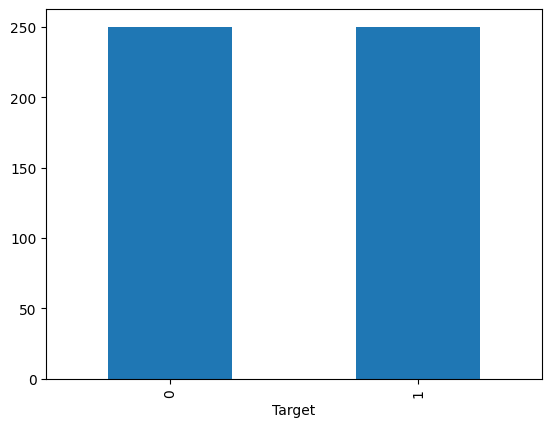

In [3]:
df['Target'].value_counts().plot.bar()


After collecting the data, we have a dataset compiled to analyze FUD, categorized as follows:

**1. Human-Caused FUD** : FUD caused by human actions occurs more frequently than those from other factors. Examples include:
* People often exaggerate [certain events](https://finbold.com/harvard-kennedy-school-professor-proposes-to-tax-crypto-over-environmental-damage/).
* Groupthink can lead to mass fear and panic.
* This sometimes results in significant, long-lasting market reactions, such as mass sell-offs and panic buying.
* It's crucial to remember that FUD is often baseless, exaggerated, or without substantial evidence.
* Initially, the truth is either nonexistent or the information is very limited.


**2. FUD Caused by Digital Assets** : FUD in the investment world, particularly in cryptocurrency, is widespread. Examples include:
* Bitcoin and other cryptocurrencies are worthless.
* Cryptocurrencies lead to crime and cyber-attacks.
* [Cryptocurrency mining is harmful to the environment](https://u.today/bitcoin-may-face-selling-pressure-due-to-potential-bankruptcies-in-mining-sector).
* Governments will soon ban Bitcoin and cryptocurrencies.
* Bitcoin and cryptocurrencies are the biggest Ponzi schemes ever.

**3. FUD Caused by Investors and Influencers** : Investors and influencers often have significant impacts on the investment world, causing widespread anxiety. Examples include:
* When investors hear unsettling news, they may panic-sell their assets out of fear.
* President Joe Biden’s news about taxing cryptocurrencies caused [Bitcoin prices to drop by 8% rapidly](https://www.cnbc.com/2022/03/09/bitcoin-btc-jumps-after-treasury-statement-on-crypto-executive-order.html).
* When multiple investors simultaneously experience fear and doubt, asset prices can plummet.
* [Investors might experience FUD regarding certain investments.](https://x.com/sassal0x/status/1596671347228188673?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1596722473784922112%7Ctwgr%5E8f768cd49f87f66a58ba5506a5e888d4679a3403%7Ctwcon%5Es2_&ref_url=https%3A%2F%2Fsiamblockchain.com%2F2022%2F11%2F28%2Fwrapped-ethereum-weth-bankruptcy-is-fud%2F)
* Recently, the mass sell-off of LUNA caused its value to drop dramatically.

**4. FUD Caused by Other Factors** : FUD can also stem from factors beyond human influence, such as:
* FUD may arise from non-human influences.
* The outbreak of diseases like COVID-19, monkeypox, or the plague.
* [Natural disasters like tsunamis](https://www.bbc.com/news/world-asia-pacific-12709598), storms, or earthquakes.

**Examples of News Reports that are FUD and Non-FUD**

**[FUD](https://www.cnbc.com/2020/10/02/president-donald-trump-says-he-has-tested-positive-for-coronavirus.html)** VS **[Non-FUD](https://www.coindesk.com/markets/2020/10/02/bitcoin-stocks-fall-as-trump-tests-positive-for-covid-19/)**

It is evident that the FUD news reported, "President Trump and First Lady Melania test positive for coronavirus," had a significant impact on investor sentiment, leading to a decline in stock prices shortly after. This news created FUD surrounding President Trump, as highlighted in subsequent non-FUD news that discusses the market impact caused by the initial FUD report regarding his coronavirus diagnosis and the **resulting stock market drop**.


# Text Processing

For text data analysis, it is essential to prepare the data in a way that facilitates accurate analysis. Before training the dataset, it must go through a text preprocessing process to remove noise that could lead to errors in the training phase.

## Stop words

Once the dataset for training the model is prepared, we remove words that do not contribute meaningful information. We start with a default set of stopwords and then add additional terms that do not add any value to the analysis, These frequently mentioned terms, mostly proper nouns, offer little value in training. Thus, they are filtered out before 

In [4]:
stopwords_ = set(stopwords.words('english'))
new_words = ['bitcoin','crypto','cryptocurrency','binance','ftx','china','united state','u.s.','ethereum','tesla','fed','says','blockchain','stocks','bank','us','u','dollar','btc','watcherguru','stackersatoshi','said','cryptocurrencies','cryptocurrency','gold','huobi','polygon','bnb','celsius','ada','ceo','solana','whalechart','fund','funds','nft','twitter','still','despites','despite','exchange','chinese','rovercrc','defi','sam','bankman','blockfi','','"',"'",'``','`','f','t']
stopwords_ = stopwords_.union(new_words)
(", ").join(stopwords_)

'ada, hasn\'t, still, doing, as, through, other, further, mustn, the, didn\'t, ourselves, its, at, shouldn\'t, off, above, theirs, this, am, and, haven\'t, huobi, needn\'t, while, solana, yours, if, don\'t, myself, him, why, now, be, y, rovercrc, is, can, yourself, then, against, weren\'t, how, watcherguru, aren\'t, twitter, same, \x92, polygon, very, sam, ve, once, between, you\'ll, i, was, so, won\'t, are, under, nft, being, during, whalechart, bank, they, their, didn, by, isn, weren, cryptocurrencies, we, bnb, t, ll, she\'s, despite, wouldn\'t, wouldn, gold, her, your, you\'d, what, she, who, before, s, until, hers, into, you\'ve, fed, u.s., both, bitcoin, itself, `, do, there, hadn\'t, won, us, our, such, just, have, celsius, with, bankman, hasn, after, ain, ``, m, my, you\'re, \', did, tesla, over, themselves, d, haven, were, aren, an, me, but, wasn\'t, because, btc, yourselves, from, hadn, should, cryptocurrency, stackersatoshi, here, any, dollar, you, ma, which, he, again, stock

After identifying the stopwords, we convert all text to lowercase to ensure consistent processing, as NLP distinguishes between different cases. We then apply a function to remove all occurrences of these stopwords from the dataset.

In [5]:
def stopwords_removal(text):
    text = text.lower()
    return " ".join([word for word in str(text).split() if word not in stopwords_])

tqdm.pandas()
df['Text'] = df['Text'].progress_apply(lambda text: stopwords_removal(text))
df.head(150)

  0%|          | 0/500 [00:00<?, ?it/s]

,Target,Text
1,0,@stackersatoshi revolut hacked third party obt...
2,1,"heading zero, state media amid global downturn"
3,0,"@stackersatoshi beware cluster resistance, clo..."
4,0,researchers allege bitcoin's climate impact cl...
5,0,binance-linked hit $570 million hack
...,...,...
146,0,@thecryptolark bear market buyers next bull ru...
147,0,@goldtelegraph_ breaking news investors pullin...
148,0,@monicacrowley isnt amazing guys like jack do...
149,0,@rovercrc ??breaking: #xrp lawsuit rumored set...


In [6]:
def stopwords_removal(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_])

tqdm.pandas()
df['Text'] = df['Text'].progress_apply(lambda text: stopwords_removal(text))

print(df['Text'][1])
df.head(100)

  0%|          | 0/500 [00:00<?, ?it/s]

@stackersatoshi revolut hacked third party obtained access one databases "through social engineering tactics."over 50k users impacted. made public lithuania,


,Target,Text
1,0,@stackersatoshi revolut hacked third party obt...
2,1,"heading zero, state media amid global downturn"
3,0,"@stackersatoshi beware cluster resistance, clo..."
4,0,researchers allege bitcoin's climate impact cl...
5,0,binance-linked hit $570 million hack
...,...,...
96,0,"8% americans positive view now, cnbc survey finds"
97,0,yen falls 32-year low
98,0,"watch out, traders! index breaches key level g..."
99,0,"headed another tough trading day s&p 500, nasd..."


To enhance the data’s effectiveness, it is necessary to remove usernames, numbers such as those starting with "@" and containing "_", as well as to remove numbers to improve the impact of the remaining words.

In [7]:
def removing_words(text):
    text= re.sub('@[A-Za-z0–9]+/_', ' ', text)
    return text

df['Text'] = df['Text'].progress_apply(lambda text: removing_words(text))
df.head(100)

  0%|          | 0/500 [00:00<?, ?it/s]

,Target,Text
1,0,@stackersatoshi revolut hacked third party obt...
2,1,"heading zero, state media amid global downturn"
3,0,"@stackersatoshi beware cluster resistance, clo..."
4,0,researchers allege bitcoin's climate impact cl...
5,0,binance-linked hit $570 million hack
...,...,...
96,0,"8% americans positive view now, cnbc survey finds"
97,0,yen falls 32-year low
98,0,"watch out, traders! index breaches key level g..."
99,0,"headed another tough trading day s&p 500, nasd..."


In [8]:
def cleaning_urls(text):
    text= re.sub('((www.[^\s]+)|(http[^\s]+))', '', text)
    text = text.lower()
    return text

df['Text'] = df['Text'].progress_apply(lambda text: cleaning_urls(text))
df.head(100)

  0%|          | 0/500 [00:00<?, ?it/s]

,Target,Text
1,0,@stackersatoshi revolut hacked third party obt...
2,1,"heading zero, state media amid global downturn"
3,0,"@stackersatoshi beware cluster resistance, clo..."
4,0,researchers allege bitcoin's climate impact cl...
5,0,binance-linked hit $570 million hack
...,...,...
96,0,"8% americans positive view now, cnbc survey finds"
97,0,yen falls 32-year low
98,0,"watch out, traders! index breaches key level g..."
99,0,"headed another tough trading day s&p 500, nasd..."


In [9]:
def removing_usernames(text):
    text= re.sub('@[A-Za-z0–9]+\_', '', text)
    text = text.lower()
    return text

df['Text'] = df['Text'].progress_apply(lambda text: removing_usernames(text))
df.head(100)

  0%|          | 0/500 [00:00<?, ?it/s]

,Target,Text
1,0,@stackersatoshi revolut hacked third party obt...
2,1,"heading zero, state media amid global downturn"
3,0,"@stackersatoshi beware cluster resistance, clo..."
4,0,researchers allege bitcoin's climate impact cl...
5,0,binance-linked hit $570 million hack
...,...,...
96,0,"8% americans positive view now, cnbc survey finds"
97,0,yen falls 32-year low
98,0,"watch out, traders! index breaches key level g..."
99,0,"headed another tough trading day s&p 500, nasd..."


In [10]:
def cleaning_numbers(text):
    return re.sub('[0-9]+', '', text)

df['Text'] =df['Text'].apply(lambda text: cleaning_numbers(text))
df.head(100)

,Target,Text
1,0,@stackersatoshi revolut hacked third party obt...
2,1,"heading zero, state media amid global downturn"
3,0,"@stackersatoshi beware cluster resistance, clo..."
4,0,researchers allege bitcoin's climate impact cl...
5,0,binance-linked hit $ million hack
...,...,...
96,0,"% americans positive view now, cnbc survey finds"
97,0,yen falls -year low
98,0,"watch out, traders! index breaches key level g..."
99,0,"headed another tough trading day s&p , nasdaq ..."


## Tokenization

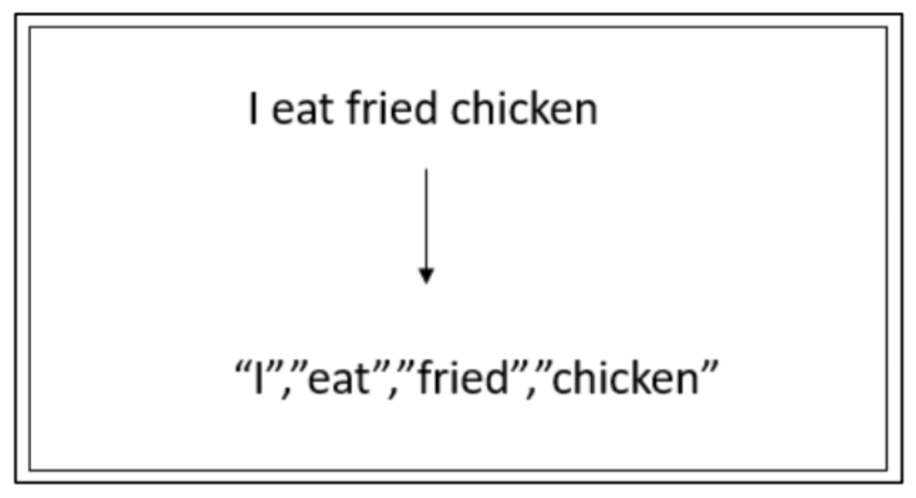

When creating word tokenization, it’s essential to analyze text data from multiple perspectives. Therefore, designing a vocabulary that includes tokens in the form of 1-gram, 2-gram, 3-gram, and beyond is necessary for comprehensive analysis.

After removing the stopwords, the next step is tokenization, where long sentences are split into shorter words. We utilize a tokenization package with the command shown

Word tokenization is the process of splitting text into individual words or word groups, called tokens. After tokenization, words are grouped and counted for further analysis. Tokens can represent individual words (1-grams) or adjacent word pairs (2-grams) and groups (3-grams), allowing for deeper insights.

The process starts by converting text into smaller tokens using delimiters, typically spaces. Although tokenization creates a list of words, it’s crucial to consider combined word patterns using N-grams (e.g., bi-grams, tri-grams) for more meaningful analysis. After stopwords are removed, tokenization prepares the text for more detailed analysis using a specialized package.



In [11]:
df['Text'] = df['Text'].progress_apply(tokenize.word_tokenize)
df['Text'].head(36)

  0%|          | 0/500 [00:00<?, ?it/s]

1     [@, stackersatoshi, revolut, hacked, third, pa...
2     [heading, zero, ,, state, media, amid, global,...
3     [@, stackersatoshi, beware, cluster, resistanc...
4     [researchers, allege, bitcoin, 's, climate, im...
5               [binance-linked, hit, $, million, hack]
6                  [binance, google, running, nodes, .]
7     [backs, rescue, ,, citing, finances, ,, invest...
8     [@, watcherguru, in, :, ?, ?, ?, ?, president,...
9     [whales, onlyfans, says, :, ``, not, seeing, s...
10    [@, bitcoinmagazine, new, -, ?, ?, ?, ?, texas...
11    [@, goonrich, good, community, worth, $, ,, ,, ,]
12    [@, cryptojobs, bear, market, biggest, opportu...
13                      [@, danheld, freedom, money, .]
14    [archive, in, :, ?, ?, ?, ?, %, americans, pla...
15                         [seeking, upside, breakouts]
16    [nifty, news, :, reddit, mints, reach, all-tim...
17     [thanks, ethereum, ,, 'altcoin, ', longer, slur]
18    [@, coinmarketcap, #, cryptonews, :, domin

## Lematization 

In English, grammatical changes can cause words to appear in different forms within sentences. For example, "Problems" may be transformed into "Problem," and "Seen" into "See." Such variations in word forms can sometimes impact the performance of predictive models. Therefore, it is necessary to convert these words into their base forms.

In [12]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [13]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatizer(text):
    text = [wnl.lemmatize(word) for word in text]
    return " ".join(text)
    
df['Text'] = df['Text'].apply(lambda text: lemmatizer(text))
print(df['Text'][1:3])
df['Text'].head(100)

2     heading zero , state medium amid global downturn
3    @ stackersatoshi beware cluster resistance , c...
Name: Text, dtype: object


1      @ stackersatoshi revolut hacked third party ob...
2       heading zero , state medium amid global downturn
3      @ stackersatoshi beware cluster resistance , c...
4      researcher allege bitcoin 's climate impact cl...
5                      binance-linked hit $ million hack
                             ...                        
96       % american positive view now , cnbc survey find
97                                    yen fall -year low
98     watch out , trader ! index breach key level gr...
99     headed another tough trading day s & p , nasda...
100                                      index % . top ?
Name: Text, Length: 100, dtype: object

In [14]:
def cleaning_ed(text):
    text= re.sub('ed','', text)
    text = text.lower()
    return text
    
df['Text'] = df['Text'].apply(lambda text: cleaning_ed(text))
df['Text'].head(120)

1      @ stackersatoshi revolut hack third party obta...
2         heading zero , state mium amid global downturn
3      @ stackersatoshi beware cluster resistance , c...
4      researcher allege bitcoin 's climate impact cl...
5                        binance-link hit $ million hack
                             ...                        
116    jim cramer 'gigantic con ' : sold bitcoin , ne...
117    meme coin rocket % , outshining dogecoin , shi...
118           metaverse land sold $ , ( , sand ) sandbox
119    exclusive : matt higgins passing cryptopunks ;...
120                here 's analyst set vastly outperform
Name: Text, Length: 120, dtype: object

## Punctuations

In English, sentences can be easily tokenized using the NLTK library. English sentences are typically ended with punctuation marks such as ‘.’ or ‘?’. These punctuation marks are common in many sentences and can introduce noise during training. Therefore, we need to remove them.

In [15]:
def cleaning_(text):
    text = re.sub('-',' ', text)
    text = text.lower()
    return text
    
df['Text'] = df['Text'].apply(lambda text: cleaning_(text))
df['Text'].head(100)

1      @ stackersatoshi revolut hack third party obta...
2         heading zero , state mium amid global downturn
3      @ stackersatoshi beware cluster resistance , c...
4      researcher allege bitcoin 's climate impact cl...
5                        binance link hit $ million hack
                             ...                        
96       % american positive view now , cnbc survey find
97                                    yen fall  year low
98     watch out , trader ! index breach key level gr...
99     head another tough trading day s & p , nasdaq ...
100                                      index % . top ?
Name: Text, Length: 100, dtype: object

In [16]:
punctuations = set(string.punctuation)
new_punctuations = ['-']
punctuations = punctuations.union(new_punctuations)
print(punctuations)
def cleaning_punctuations(text):
    return " ".join([word for word in str(text).split() if word not in punctuations])

tqdm.pandas()
df['Text'] = df['Text'].progress_apply(lambda text: cleaning_punctuations(text))
df.head(100)

{"'", ':', '/', '_', '[', '~', ';', '&', '.', '#', '-', '>', ']', '?', '^', '}', '\\', '$', '=', '(', '!', '{', '*', '"', '+', '`', '<', '|', ')', '%', '@', ','}


  0%|          | 0/500 [00:00<?, ?it/s]

,Target,Text
1,0,stackersatoshi revolut hack third party obtain...
2,1,heading zero state mium amid global downturn
3,0,stackersatoshi beware cluster resistance close...
4,0,researcher allege bitcoin 's climate impact cl...
5,0,binance link hit million hack
...,...,...
96,0,american positive view now cnbc survey find
97,0,yen fall year low
98,0,watch out trader index breach key level greenb...
99,0,head another tough trading day s p nasdaq futu...


Data cleaning is performed to reduce noise again before training.

In [17]:
def stopwords_removal(text):
    text = text.lower()
    return " ".join([word for word in str(text).split() if word not in stopwords_])

tqdm.pandas()
df['Text'] = df['Text'].progress_apply(lambda text: stopwords_removal(text))
df['Text'].head(100)

  0%|          | 0/500 [00:00<?, ?it/s]

1      revolut hack third party obtain access one dat...
2           heading zero state mium amid global downturn
3      beware cluster resistance close october could ...
4      researcher allege 's climate impact closer 'di...
5                                  link hit million hack
                             ...                        
96               american positive view cnbc survey find
97                                     yen fall year low
98     watch trader index breach key level greenback ...
99     head another tough trading day p nasdaq future...
100                                            index top
Name: Text, Length: 100, dtype: object

In [18]:
def cleaning_keed(text):
    text = re.sub("'s",'', text)
    text = text.lower()
    return text
    
df['Text'] = df['Text'].apply(lambda text: cleaning_keed(text))
df['Text'].head(100)

1      revolut hack third party obtain access one dat...
2           heading zero state mium amid global downturn
3      beware cluster resistance close october could ...
4      researcher allege  climate impact closer 'digi...
5                                  link hit million hack
                             ...                        
96               american positive view cnbc survey find
97                                     yen fall year low
98     watch trader index breach key level greenback ...
99     head another tough trading day p nasdaq future...
100                                            index top
Name: Text, Length: 100, dtype: object

In [19]:
def cleaning_keed(text):
    text = re.sub("s",'', text)
    text = text.lower()
    return text
    
df['Text'] = df['Text'].apply(lambda text: cleaning_keed(text))
df['Text'].head(100)

1      revolut hack third party obtain access one dat...
2           heading zero state mium amid global downturn
3      beware cluster resistance close october could ...
4      researcher allege  climate impact closer 'digi...
5                                  link hit million hack
                             ...                        
96               american positive view cnbc survey find
97                                     yen fall year low
98     watch trader index breach key level greenback ...
99     head another tough trading day p nasdaq future...
100                                            index top
Name: Text, Length: 100, dtype: object

In [20]:
def cleaning_keed(text):
    text = re.sub('warns','warn', text)
    text = text.lower()
    return text
    
df['Text'] = df['Text'].apply(lambda text: cleaning_keed(text))
df['Text'].head(100)

1      revolut hack third party obtain access one dat...
2           heading zero state mium amid global downturn
3      beware cluster resistance close october could ...
4      researcher allege  climate impact closer 'digi...
5                                  link hit million hack
                             ...                        
96               american positive view cnbc survey find
97                                     yen fall year low
98     watch trader index breach key level greenback ...
99     head another tough trading day p nasdaq future...
100                                            index top
Name: Text, Length: 100, dtype: object

In [21]:
def stopwords_removal(text):
    text = text.lower()
    return " ".join([word for word in str(text).split() if word not in stopwords_])

tqdm.pandas()
df['Text'] = df['Text'].progress_apply(lambda text: stopwords_removal(text))
df.head(373)

  0%|          | 0/500 [00:00<?, ?it/s]

,Target,Text
1,0,revolut hack third party obtain access one dat...
2,1,heading zero state mium amid global downturn
3,0,beware cluster resistance close october could ...
4,0,researcher allege climate impact closer 'digit...
5,0,link hit million hack
...,...,...
369,1,treasury secretary janet yellen economy risk r...
370,1,yesterday associat company fil bankruptcy last...
371,0,coinlist lot fud going around would like addre...
372,1,wublockchain community member report coinlist ...


## WordCloud

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two.

Let's start with our dataset

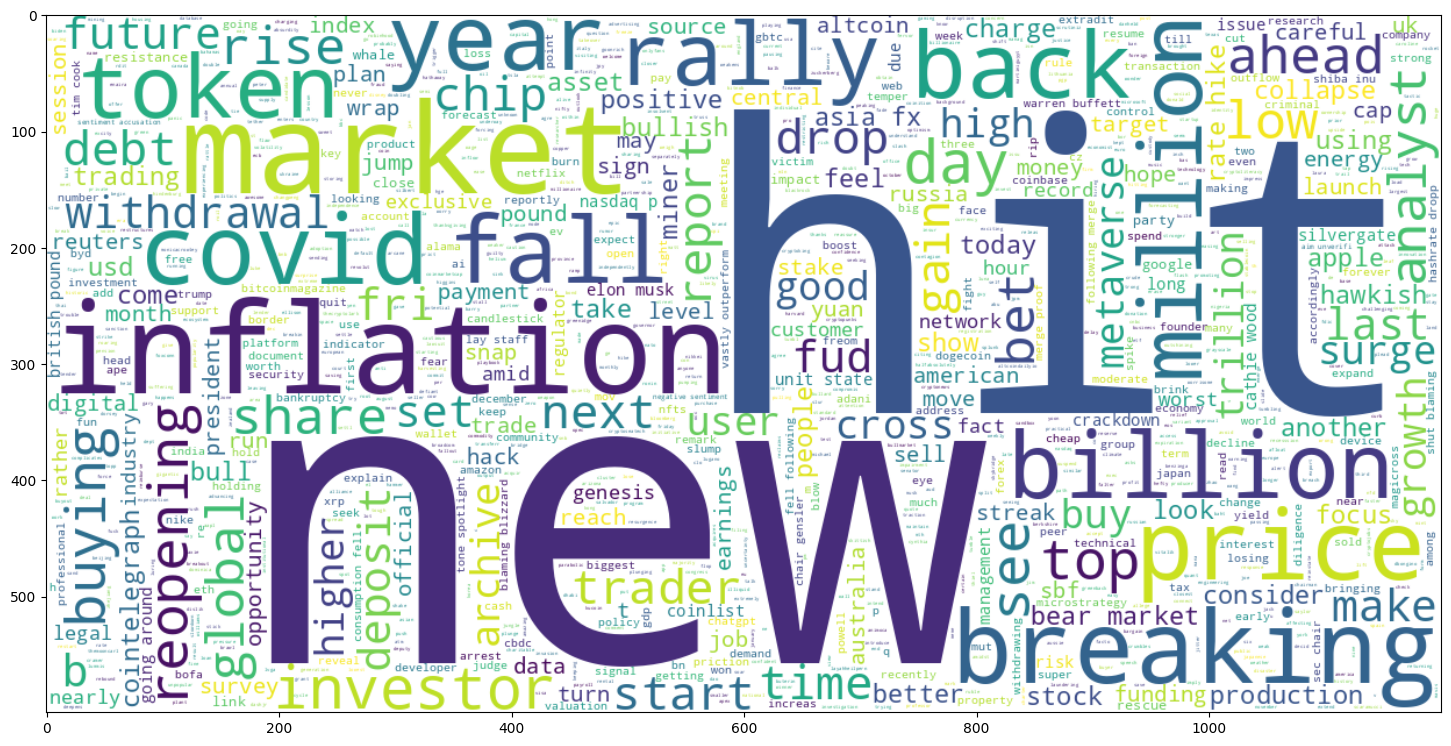

In [22]:
from wordcloud import WordCloud

plt.figure(figsize = (18,18)) 
wc = WordCloud(background_color='white',max_words = 1000 , width = 1200 , height = 600).generate(" ".join(df[df['Target'] == '0']['Text']))
plt.imshow(wc , interpolation = 'bilinear')

From the dataset, the most frequently occurring non-FUD words are **"New," "Hit," "Inflation," "Breaking," and "Market."**

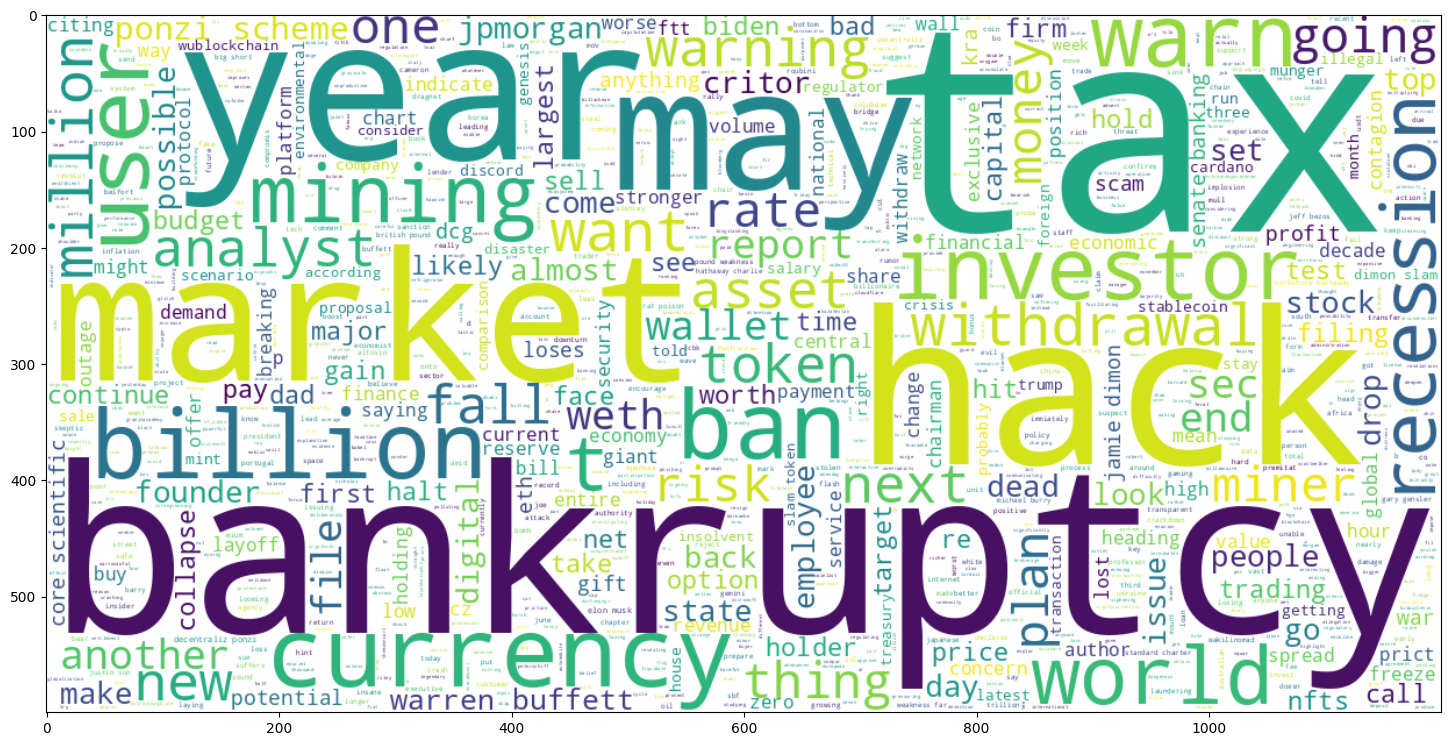

In [23]:
plt.figure(figsize = (18,18)) 
wc = WordCloud(background_color='white',max_words = 1000 , width = 1200 , height = 600).generate(" ".join(df[df['Target'] == '1']['Text']))
plt.imshow(wc , interpolation = 'bilinear')

From the dataset, the most frequently occurring FUD words are **"Tax," "Bankruptcy," "Hack," "Year," and "Market."**

## Training

In [24]:
TRAIN_SIZE = 0.8 #Defines the fraction of data to be used for training 
MAX_NB_WORDS = 100000 #Specifies the maximum number of unique words to consider
MAX_SEQUENCE_LENGTH = 30 #Limits the length of input sequences to 30 words.

In [25]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 400
Test Data size 100


In [26]:
train_data.head(10)

,Target,Text
343,1,australian budget confirms digital asset tax f...
360,1,outlet coindesk mull sale dcg woe deepen
110,0,disney plan freeze hiring cut job memo show
51,0,asian mut surge zero covid bet
453,1,early investor bo shen lost million wallet hac
290,1,peterschiff put rally perspective take look ch...
15,0,seeking upside breakout
363,1,warren buffett 'it going anything  'd rather ...
115,0,microstrategy report impairment charge k holdi...
369,1,treasury secretary janet yellen economy risk r...


In [27]:
!pip install --upgrade tensorflow keras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: t

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['Text'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 1704


In [29]:
x_train = tf.keras.utils.pad_sequences(tokenizer.texts_to_sequences(train_data['Text']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = tf.keras.utils.pad_sequences(tokenizer.texts_to_sequences(test_data['Text']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (400, 30)
Testing X Shape: (100, 30)


In [30]:
#Trains the LabelEncoder on the unique values in the Target column of the training data, mapping each unique label to a numerical value.
labels = train_data['Target'].unique().tolist() 

This code initializes a LabelEncoder, fits it on the target labels in the train_data to map each unique label to a numerical value, which is essential for converting categorical labels into a format usable by machine learning models.

In [31]:
encoder = LabelEncoder() #used to convert categorical labels into numerical values.
encoder.fit(train_data['Target'].to_list())

y_train = encoder.transform(train_data['Target'].to_list())
y_test = encoder.transform(test_data['Target'].to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (400, 1)
y_test shape: (100, 1)


In [32]:
EMBEDDING_DIM = 300 #sets the dimensionality of the embedding vectors to 300
LR = 1e-3 #specifies the learning rate for the model's optimization algorithm
BATCH_SIZE = 16 #sets the number of samples processed before the model's weights are updated
EPOCHS = 20 #defines the number of times the entire training dataset

The command !wget http://nlp.stanford.edu/data/glove.6B.zip is used to download a file from a URL using wget, a command-line utility for retrieving files from the web. In this case, it downloads the GloVe (Global Vectors for Word Representation) pre-trained word embeddings file from the Stanford NLP group

In [33]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-08-19 05:12:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-08-19 05:12:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-08-19 05:12:44--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: 'glove.6B.zip'

glov

In [34]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [35]:
embeddings_index = {}
f = open('glove.6B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [36]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [37]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Modeling

Long Short-Term Memory (LSTM) networks represent a widely recognized variant of Recurrent Neural Networks (RNNs), particularly effective in handling sequential data, such as that encountered in sentiment analysis. LSTMs excel at capturing long-range dependencies within textual data, making them particularly suitable for sentiment analysis tasks where the sentiment of a sentence or paragraph may rely heavily on context established by preceding words in the sequence. Therefore, in this study, we employ the [LSTM Model](https://iopscience.iop.org/article/10.1088/1757-899X/1074/1/012007/pdf)  for training the dataset, given its capacity to address the sequential nature of textual information.

In [38]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

In [39]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu', kernel_regularizer = regularizers.l2(1e-5))(x)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer = regularizers.l2(1e-5)))(x)
x = Dense(512, activation='relu', kernel_regularizer = regularizers.l2(1e-5))(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu', kernel_regularizer = regularizers.l2(1e-5))(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

**Optimization**

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 2)

In [41]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on GPU...


In [42]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.4919 - loss: 0.7113 - val_accuracy: 0.6500 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5890 - loss: 0.6820 - val_accuracy: 0.7100 - val_loss: 0.5767 - learning_rate: 0.0010
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7283 - loss: 0.5486 - val_accuracy: 0.6800 - val_loss: 0.6161 - learning_rate: 0.0010
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8327 - loss: 0.3871 - val_accuracy: 0.7000 - val_loss: 0.7199 - learning_rate: 0.0010
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8986 - loss: 0.2666 - val_accuracy: 0.7000 - val_loss: 0.6105 - learning_rate: 0.0010
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9594 - loss: 0.1752 - val_accuracy: 0.6800 - val_loss: 1.0797 - learning_rate: 0.0010
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9469 - loss: 0.1789 - val_ac

It can be observed that after approximately 10 epochs, the model's performance trends reach a peak and stabilize, with the accuracy averaging around 76-79 percent. The loss value increases and stabilizes close to 2, indicating that the model is well-suited for the test data set.

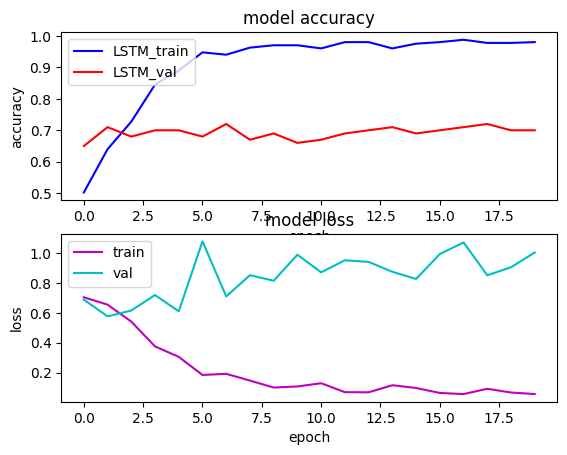

In [43]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [44]:
def decode_sentiment(score):
    return "1" if score>0.5 else "0"

scores = model.predict(x_test, verbose=1, batch_size=1000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


In [45]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    print(thresh)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

0.36666666666666664


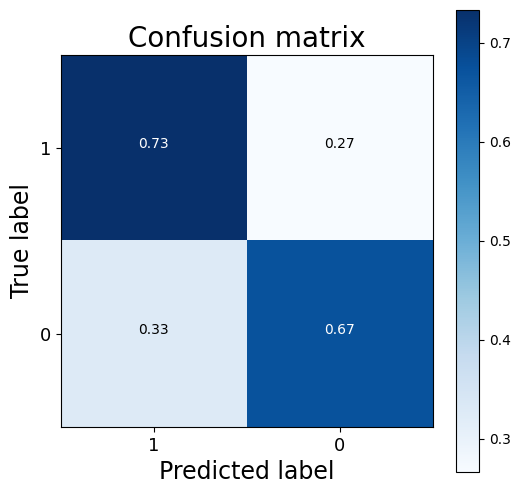

In [46]:
cnf_matrix = confusion_matrix(test_data['Target'].to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data['Target'].unique(), title="Confusion matrix")
plt.show()

In [47]:
print(classification_report(list(test_data['Target']), y_pred_1d))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        45
           1       0.76      0.67      0.71        55

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.71      0.70      0.70       100



## Conclusions and next steps

In this notebook, we explore the intricate world of Investment using **Sentiment Analysis** 


An idea could be to implement the following Modeling:
- Create a list of insignificant tokens such as proper nouns from the start, rather than removing them after analysis, to enhance token removal efficiency.
- Data collection needs expertise and time, so involving experts and enhancing data quantity and quality can boost model accuracy and reliability.
- Expand data categories beyond investment topics to reduce overfitting risks.
- Use a pre-trained NER model to identify named entities and reduce manual labeling, improving token cutting efficiency.
- Use the dataset pretraind model in LLM such as Gemma

**Stay tuned, any feedback will be appreciated!**